A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Build a classifier to predict the service category for unknown cases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

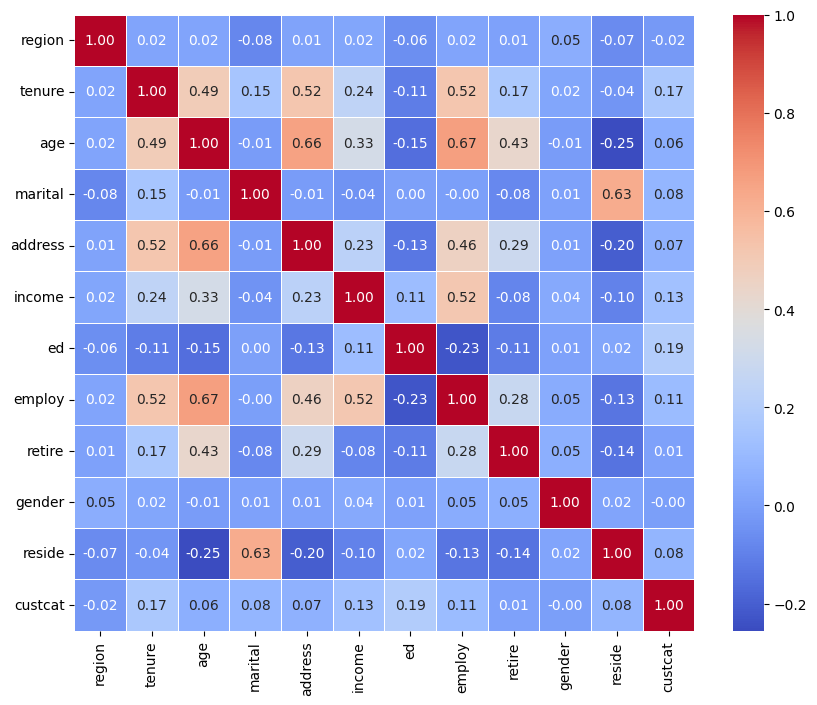

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

<Axes: >

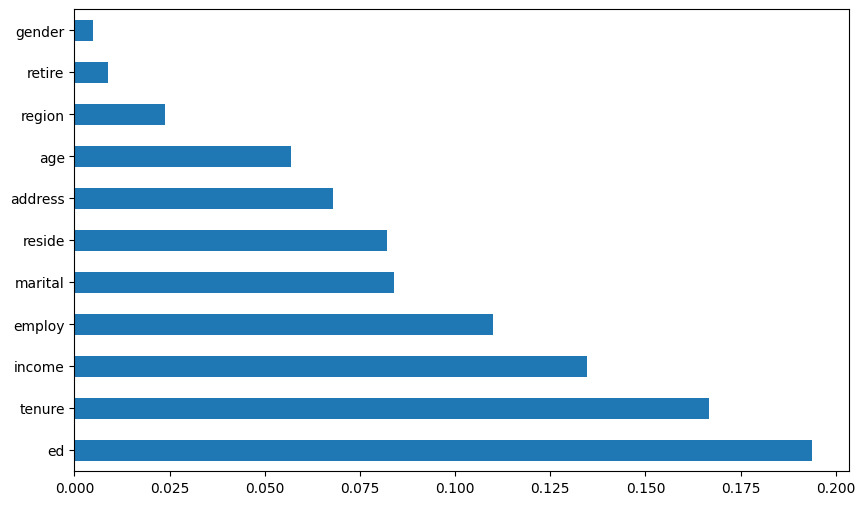

In [7]:
corr_val = abs(df.corr()['custcat'].drop('custcat'))
corr_val.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))

In [9]:
X = df.drop('custcat', axis=1)
y = df['custcat']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
k = 6

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

yhat = knn_model.predict(X_test)
print("Test set Accuracy:", accuracy_score(y_test, yhat))

Test set Accuracy: 0.3566666666666667


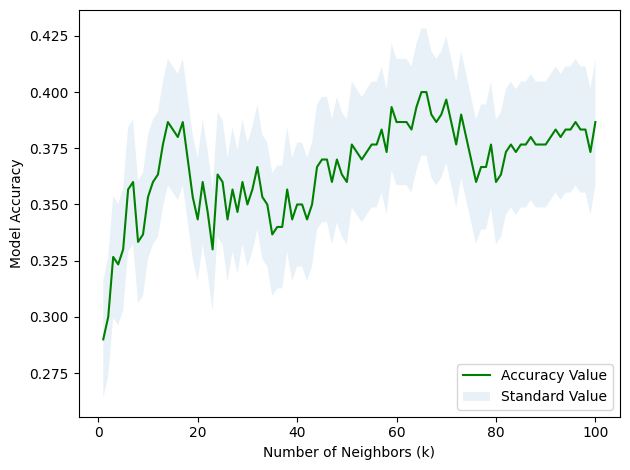

In [20]:
ks = 100
acc = np.zeros((ks))
std_acc = np.zeros((ks))

for n in range(1, ks+1):
    knn_model_n = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1, ks+1), acc, 'g')
plt.fill_between(range(1, ks+1), acc-1*std_acc, acc+1*std_acc, alpha=0.10)
plt.legend(('Accuracy Value', 'Standard Value'))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Model Accuracy')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.4 with k = 65


In [22]:
k = 65

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

yhat = knn_model.predict(X_test)
print("Test set Accuracy:", accuracy_score(y_test, yhat))

Test set Accuracy: 0.4


The weak performance on the model can be due to multiple reasons.
1. The KNN model relies entirely on the raw feature space at inference time. If the features do not provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation.
2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN.
3. The algorithm treats all features equally when computing distances. Hence, weakly correlated features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.